**Anti Money Laundering (AML)**

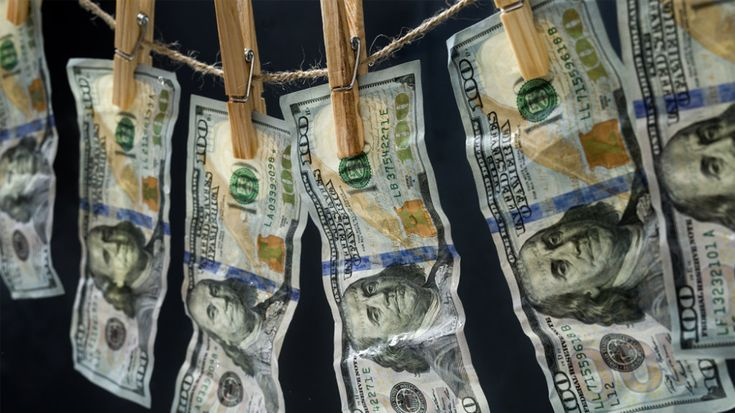

**Subtitle**: Unveiling Illicit Transactions with XGBoost

**Author**: Muthui Ziggy

**Date**: 21st August 2024

**Abstract**

This project seeks to understand patterns within various monetary transactions, labeling them as either money laundering cases or normal transactions. The XG Boost classification model has been trained on a dataset comprising 200,000 transaction records and 12 features. It has been able to achieve an overall test accuracy score of 99%, indicating a huge potential to beat money launderers at their own game.

**Table of Content**
1.	Introduction
2.	Literature Review
3.	Data Collection and Preparation
4.	Methodology
5.	Implementation
6.	Results
7.	Discussion
8.	Conclusion
9.	References
10.	Appendices

**1.Introduction**

Background

Money laundering is the process of making money earned through illegal activities appear ‘clean’ through a complex sequence of bank transactions. Kenya was placed in the ‘grey list’ by the Financial Action Task Force early 2024 for the second time, calling for increased efforts to combat money laundering.

Problem Statement

Money laundering in Kenya has become a significant concern due to the increasing sophistication of financial crimes and inadequate countering mechanisms by both banks and government. This project seeks to help detect anomalies within bank transactions, successfully classifying each one as either money laundering or a normal transaction.

Objectives

•	To preprocess transaction data for training.

•	To build and train a XG Boost classifier.

•	To evaluate the model's performance using various metrics.

Scope

This project aims to classify bank transactions as either money laundering cases or normal transactions.

**2.Literature review**

Asad et al. (2019) highlighted the limitations of rule-based systems in AML and proposed the use of machine learning models to automatically detect anomalies in financial transactions. Their work showed significant improvement in identifying suspicious activities compared to traditional methods.

**3.Data collection and preparation**

Data Sources

The dataset used in this project consists of bank transactions obtained from the IBM Transactions for Anti Money Laundering (AML) dataset (https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml).

Data Preparation

•	Numerical features were scaled using StandardScaler

•	Categorical features were encoded using OneHotEncoder

•	The dataset was split into training data (80%) and testing data (20%)

**4.Methodology**

Method Selection

I used XG Boost classifier because of its robustness and effectiveness in handling complex classification tasks.

Model Architecture

I used grid search to establish the best parameters for the model as:
classifier__learning_rate: 0.1,

classifier__max_depth: 5,

classifier__n_estimators: 200


Evaluation Metrics

•	Average precision
•	ROC AUC score
•	Classification report

**5.Implementation**

Tools and Libraries

•	Pandas
•	Numpy
•	Matplotlib

**6.Results**

Model Performance

The model achieved a test accuracy of 0.9998 and a ROC AUC score of 1.000

**7.Discussion**

Interpretation of results

The model achieved a high test accuracy and ROC AUC score indicating its ability to correctly identify money laundering cases.

**8.Conclusion**

Summary

The project was able to successfully yield a robust and effective classification model for detection of money laundering transactions.

Future Work

•	Explore other potential classification models.

•	Increase dataset size and diversity.

•	Implement real-time classification in a bank setting.


**9.References**

•	Asad, M., et al. (2019). "Machine Learning Techniques in Anti-Money Laundering: A Survey." Journal of Financial Crime.

•	Money Laundering and Terrorism Financing National Risk Assessment Report (https://www.centralbank.go.ke/wp-content/uploads/2023/06/Money-Laundering-and-Terrorism-Financing-National-Risk-Assesstment-Report.pdf)

•	The National Treasury and Economic Planning Press Statement(https://www.treasury.go.ke/wp-content/uploads/2024/03/Scanb-CS2.pdf)


**10.Appendices**



**Importing necessary libraries**

In [1]:
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Loading**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/MoneyLaundering.csv/SAML-D.csv')
data.head(10)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
5,10:35:21,2022-10-07,8974559268,3143547511,5130.99,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Group
6,10:35:23,2022-10-07,980191499,8577635959,12176.52,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
7,10:35:23,2022-10-07,8057793308,9350896213,56.90,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out
8,10:35:26,2022-10-07,6116657264,656192169,4738.45,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out
9,10:35:29,2022-10-07,7421451752,2755709071,5883.87,Indian rupee,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out


In [4]:
data.tail(10)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
9504842,10:56:44,2023-08-23,5096785569,5718941670,5138.32,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out
9504843,10:56:45,2023-08-23,68853622,6973971987,11682.07,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504844,10:56:52,2023-08-23,1886868543,7859647997,7978.76,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_Out
9504845,10:56:54,2023-08-23,878829325,5119883991,6038.31,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
9504846,10:56:56,2023-08-23,1800353787,5112488398,5281.87,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
9504851,10:57:12,2023-08-23,105185176,6824994831,9586.08,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_Out


**Data Understanding**

In [5]:
#Dataset shape
print("Initial Dataset Shape : ", data.shape)
print("\n")

Initial Dataset Shape :  (9504852, 12)




In [6]:
#Selecting an evenly distributed sample from the dataset
data, _ = train_test_split(data, stratify=data['Is_laundering'],
                                   train_size=200000, random_state=5)

print("New Dataset Shape: ", data.shape)


New Dataset Shape:  (200000, 12)


In [7]:
#Assessing column data types
data.dtypes.to_frame().T

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,object,object,int64,int64,float64,object,object,object,object,object,int64,object


In [8]:
#Assessing missing values
data.isna().sum()

,0
Time,0
Date,0
Sender_account,0
Receiver_account,0
Amount,0
Payment_currency,0
Received_currency,0
Sender_bank_location,0
Receiver_bank_location,0
Payment_type,0


In [9]:
#Statistical information of categorical features
data.describe(include = object)

,Time,Date,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Laundering_type
count,200000,200000,200000,200000,200000,200000,200000,200000
unique,69778,321,13,13,18,18,7,27
top,18:37:00,2022-12-23,UK pounds,UK pounds,UK,UK,ACH,Normal_Small_Fan_Out
freq,13,774,191473,184692,193226,186349,42604,73380


In [10]:
#Statistical information of numerical features
data.describe()

,Sender_account,Receiver_account,Amount,Is_laundering
count,2.000000e+05,2.000000e+05,200000.000000,200000.000000
mean,5.009829e+09,5.010205e+09,8693.776557,0.001040
std,2.885128e+09,2.882372e+09,21024.671965,0.032232
min,3.209500e+04,9.927800e+04,8.360000,0.000000
25%,2.528861e+09,2.512595e+09,2122.810000,0.000000
50%,5.006271e+09,5.001017e+09,6111.220000,0.000000
75%,7.503307e+09,7.504160e+09,10403.075000,0.000000
max,9.999767e+09,9.999971e+09,992045.520000,1.000000


**Exploratory Data Analysis**

In [11]:
#Understanding the target feature
data['Is_laundering'].value_counts()

,count
Is_laundering,
0,199792
1,208


Text(0, 0.5, 'Frequency')

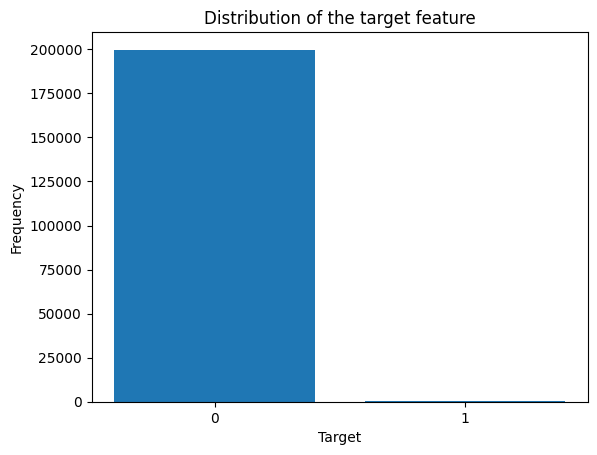

In [12]:
#Visualizing the distribution of the target feature
target = data['Is_laundering'].value_counts()

plt.bar(target.index, target.values)
plt.title('Distribution of the target feature')
plt.xlabel('Target')
plt.xticks(ticks = target.index, labels = ['0', '1'])
plt.ylabel('Frequency')

In [13]:
print('Minimum: ', data['Amount'].min())
print('Maximum: ', data['Amount'].max())

Minimum:  8.36
Maximum:  992045.52


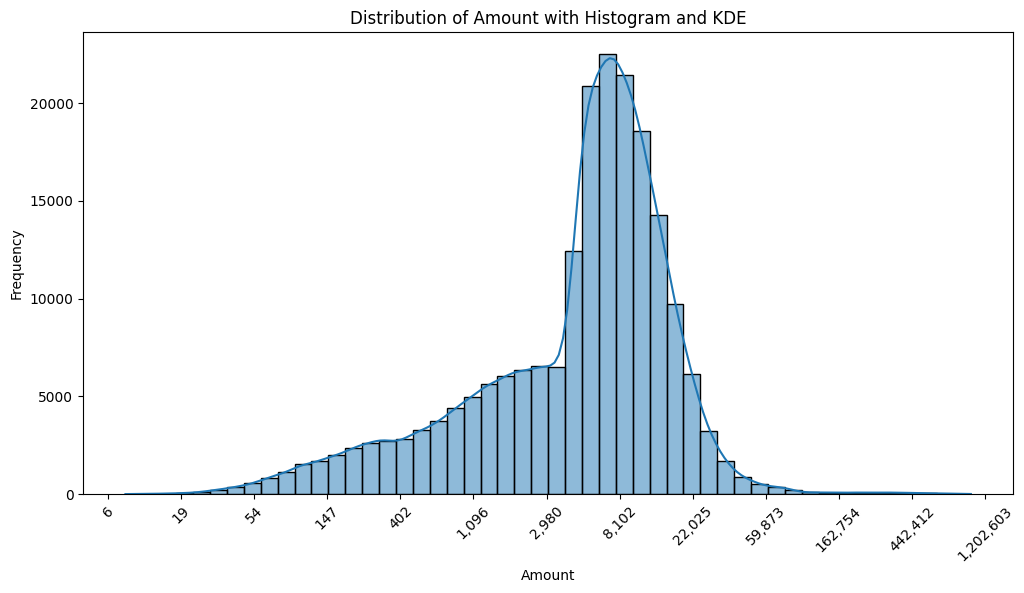

In [14]:
# Plotting the histogram and kde
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(data['Amount']), bins=50, kde=True)  # kde=True adds the line graph

log1p_labels = np.arange(2, 15)
labels = [f'{np.expm1(x):,.0f}' for x in log1p_labels]

# Set the title and labels
plt.title('Distribution of Amount with Histogram and KDE')
plt.xlabel('Amount')
plt.xticks(log1p_labels, labels, rotation = 45)
plt.ylabel('Frequency')

# Show the plot
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'UK pounds'),
  Text(1, 0, 'Euro'),
  Text(2, 0, 'Yen'),
  Text(3, 0, 'Naira'),
  Text(4, 0, 'Turkish lira'),
  Text(5, 0, 'Swiss franc'),
  Text(6, 0, 'Moroccan dirham'),
  Text(7, 0, 'Dirham'),
  Text(8, 0, 'Pakistani rupee'),
  Text(9, 0, 'US dollar'),
  Text(10, 0, 'Albanian lek'),
  Text(11, 0, 'Indian rupee'),
  Text(12, 0, 'Mexican Peso')])

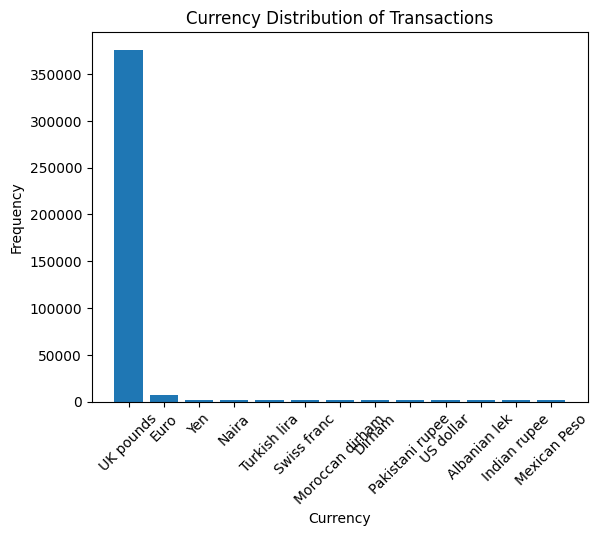

In [15]:
#Exploring currency distribution of transactions
import matplotlib.pyplot as plt

currencies = pd.concat([data['Payment_currency'], data['Received_currency']], axis = 0)
currency_counts = currencies.value_counts()

plt.bar(currency_counts.index, currency_counts.values)

plt.title('Currency Distribution of Transactions')
plt.xlabel('Currency')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'ACH'),
  Text(1, 0, 'Cheque'),
  Text(2, 0, 'Credit card'),
  Text(3, 0, 'Debit card'),
  Text(4, 0, 'Cross-border'),
  Text(5, 0, 'Cash Withdrawal'),
  Text(6, 0, 'Cash Deposit')])

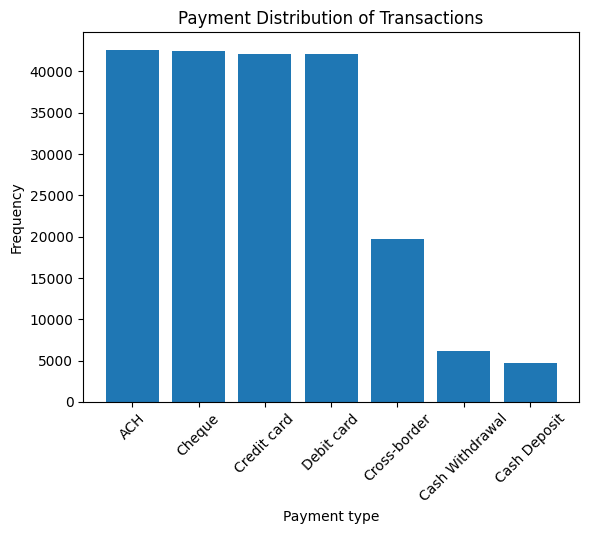

In [16]:
#assessing payment distribution of transactions
payment = data['Payment_type']
payment_counts = payment.value_counts()

plt.bar(payment_counts.index, payment_counts.values)

plt.title('Payment Distribution of Transactions')
plt.xlabel('Payment type')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

**Data Preparation for Modeling**

In [17]:
#converting account numbers from integer to object type
data['Sender_account'] = data['Sender_account'].astype('object')
data['Receiver_account'] = data['Receiver_account'].astype('object')
#converting date and time from object to datetime type
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

#extracting components of date and time and converting them to object type
data['Year'] = data['Date'].dt.year.astype('object')
data['Month'] = data['Date'].dt.month.astype('object')
data['Day'] = data['Date'].dt.day.astype('object')
data['Hour'] = data['Time'].apply(lambda x: x.hour).astype('object')
data['Minute'] = data['Time'].apply(lambda x: x.minute).astype('object')

data.head(10)


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Year,Month,Day,Hour,Minute
9248111,15:36:03,2023-08-14,4638677256,1079670110,93.52,UK pounds,UK pounds,UK,UK,Cash Withdrawal,0,Normal_Cash_Withdrawal,2023,8,14,15,36
3848521,13:01:57,2023-02-14,7815302114,3197834526,3039.22,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Group,2023,2,14,13,1
5176301,10:42:05,2023-03-30,7226196470,5268396252,4541.06,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,2023,3,30,10,42
1576602,23:46:40,2022-11-29,8312632191,6112747725,10216.50,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,2022,11,29,23,46
8395688,09:31:20,2023-07-16,2934751586,5025351540,10231.55,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Fan_Out,2023,7,16,9,31
3835906,23:48:00,2023-02-13,7268388687,8875493044,5540.13,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Fan_Out,2023,2,13,23,48
5404149,19:40:57,2023-04-06,1894073239,2112112434,18076.46,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out,2023,4,6,19,40
5593084,09:26:42,2023-04-13,3367672560,6559530225,4614.16,UK pounds,Euro,UK,Austria,Cross-border,0,Normal_Fan_Out,2023,4,13,9,26
4489897,20:43:08,2023-03-06,789360119,2266090026,532.54,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out,2023,3,6,20,43
2606315,12:42:00,2023-01-04,1795093491,1613805752,4315.41,UK pounds,Turkish lira,UK,Turkey,Cross-border,0,Normal_Small_Fan_Out,2023,1,4,12,42


In [29]:
#Balancing the highly imbalanced target feature
from sklearn.utils import resample

majority_class = data[data['Is_laundering'] == 0]
minority_class = data[data['Is_laundering'] == 1]

#Undersampling the majority class
majority_class_undersampled = resample(majority_class, replace = False, n_samples = len(minority_class)*900, random_state = 23)

#Oversampling the minority class
minority_class_oversampled = resample(minority_class, replace = True, n_samples = len(minority_class)*900, random_state = 23)

# Combine the undersampled majority class with the oversampled minority class
balanced_data = pd.concat([majority_class_undersampled, minority_class_oversampled])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_data['Is_laundering'].value_counts()


,count
Is_laundering,
1,187200
0,187200


In [30]:
#defining x and y for training and testing
x = balanced_data.drop(['Is_laundering', 'Date', 'Time'], axis = 1)
y = balanced_data['Is_laundering']

#splitting x and y into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = balanced_data['Is_laundering'], random_state = 23)
print("Training set: ", x_train.shape)
print("Testing set: ", x_test.shape)

Training set:  (299520, 14)
Testing set:  (74880, 14)


In [31]:
#assessing column data types for x
x.dtypes.to_frame().T

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Laundering_type,Year,Month,Day,Hour,Minute
0,object,object,float64,object,object,object,object,object,object,object,object,object,object,object


**Modeling**

In [32]:
#Creating a Pipeline
# Defining preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x_train.select_dtypes(include='number').columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), x_train.select_dtypes(include='object').columns)
    ]
)

# Defining the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(random_state=23))
])

# Defining the parameter grid for GridSearchCV
param_grid = {
    'classifier__max_depth': [1, 3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2,],
    'classifier__n_estimators': [100, 200, 300]
}

# Initializing GridSearchCV
cv = GridSearchCV(pipeline, param_grid, scoring='average_precision', cv=5, verbose=5)

# Fitting the model using GridSearchCV
cv.fit(x_train, y_train)

# Retrieving the best model
best_model = cv.best_estimator_

print('Best Parameters:', cv.best_params_)
print('Best CV Score:', cv.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END classifier__learning_rate=0.01, classifier__max_depth=1, classifier__n_estimators=100;, score=0.856 total time=   7.8s
[CV 2/5] END classifier__learning_rate=0.01, classifier__max_depth=1, classifier__n_estimators=100;, score=0.854 total time=   7.0s
[CV 3/5] END classifier__learning_rate=0.01, classifier__max_depth=1, classifier__n_estimators=100;, score=0.856 total time=   7.3s
[CV 4/5] END classifier__learning_rate=0.01, classifier__max_depth=1, classifier__n_estimators=100;, score=0.852 total time=   6.7s
[CV 5/5] END classifier__learning_rate=0.01, classifier__max_depth=1, classifier__n_estimators=100;, score=0.857 total time=   7.5s
[CV 1/5] END classifier__learning_rate=0.01, classifier__max_depth=1, classifier__n_estimators=200;, score=0.892 total time=   9.5s
[CV 2/5] END classifier__learning_rate=0.01, classifier__max_depth=1, classifier__n_estimators=200;, score=0.890 total time=  11.2s
[CV 3/5] END c

Confusion Matrix:
 [[37204   236]
 [    0 37440]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     37440
           1       0.99      1.00      1.00     37440

    accuracy                           1.00     74880
   macro avg       1.00      1.00      1.00     74880
weighted avg       1.00      1.00      1.00     74880


Test Accuracy: 0.9968

ROC AUC Score: 1.0000


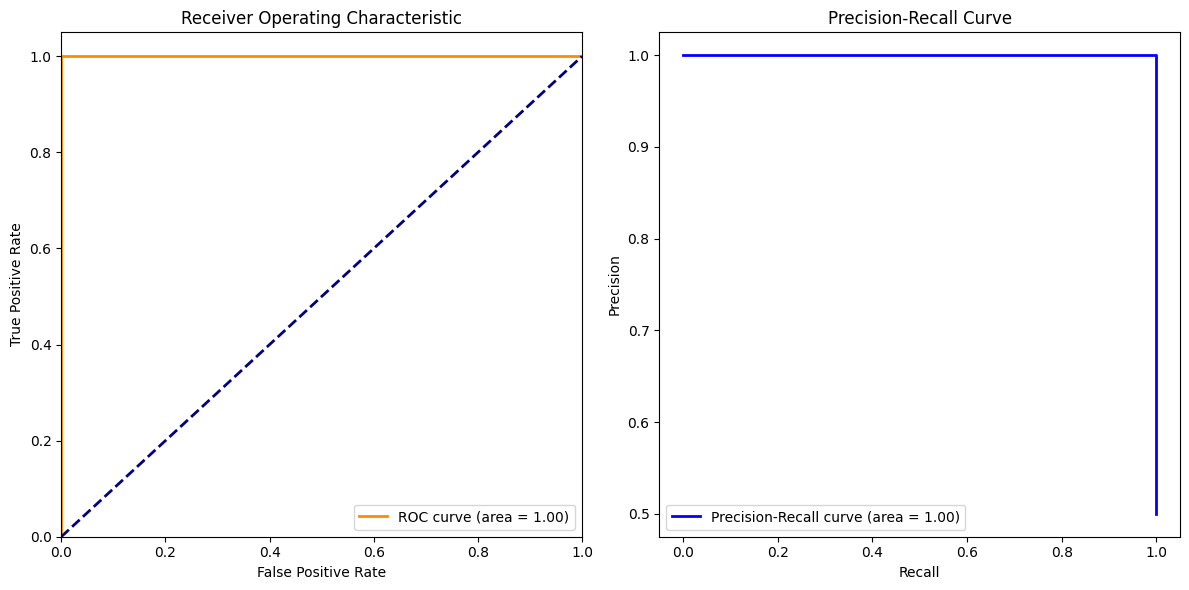

In [33]:
# Evaluate the model
y_pred = best_model.predict(x_test)
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Accuracy Score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc_value = auc(recall, precision)

# Create subplots
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Subplot for Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc_value:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
